In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest,f_regression

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"C:\Users\naimu\Softroniics\Assignments\House_Prices.csv")

In [3]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790.0,2,2,2,No,East
1,2,114200,2030.0,4,2,3,No,East
2,3,114800,1740.0,3,2,1,No,East
3,4,94700,1980.0,3,2,3,No,East
4,5,119800,2130.0,3,3,3,No,East


In [4]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

# Variable Description
* target variable(y):Price
* independent variable(x)
    * Home
    * SqFt
    * Bedrooms
    * Bathrooms
    * Offers
    * Brick
    * Neighborhood
    

In [5]:
df.tail()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
123,124,119700,1900.0,3,3,3,Yes,East
124,125,147900,2160.0,4,3,3,Yes,NaN
125,126,113500,2070.0,2,2,2,No,North
126,127,149900,2020.0,3,3,1,No,West
127,128,124600,2250.0,3,3,4,No,North


In [6]:
df.shape

(128, 8)

In [7]:
df.dtypes

Home              int64
Price             int64
SqFt            float64
Bedrooms          int64
Bathrooms         int64
Offers            int64
Brick            object
Neighborhood     object
dtype: object

In [8]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,127.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,1997.716535,3.023438,2.445312,2.578125
std,37.094474,26868.770371,209.235908,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [9]:
df.isnull().sum()

Home            0
Price           0
SqFt            1
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    1
dtype: int64

In [10]:
df["SqFt"]= df["SqFt"].fillna(df["SqFt"].median())

In [11]:
df.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    1
dtype: int64

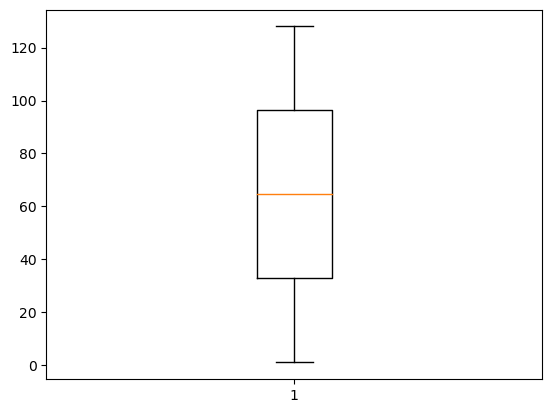

In [12]:
# check outlier in numeric colum
plt.boxplot(df["Home"])
plt.show()

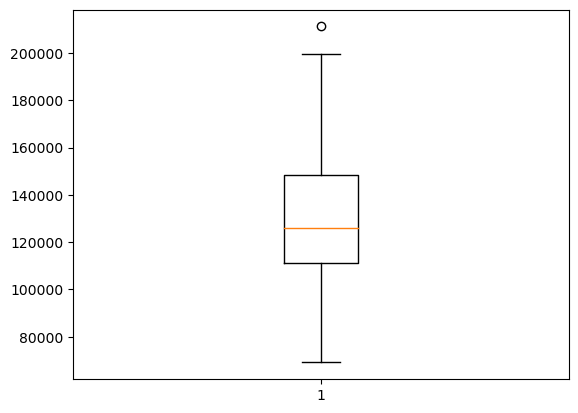

In [13]:
plt.boxplot(df["Price"]) 
plt.show()

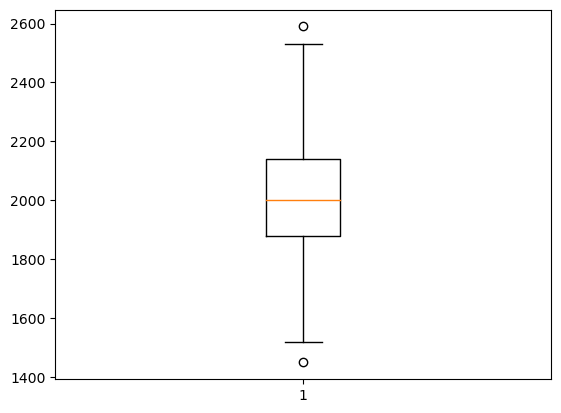

In [14]:
plt.boxplot(df["SqFt"]) 
plt.show()

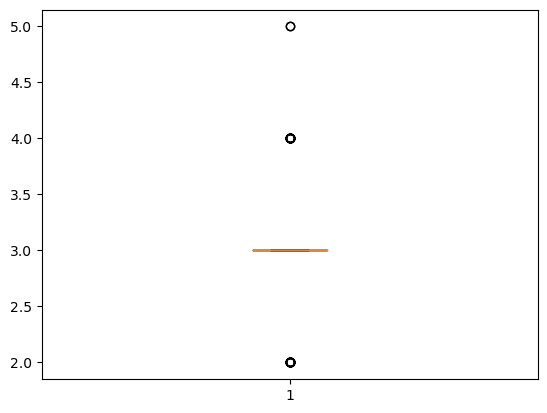

In [15]:
plt.boxplot(df["Bedrooms"]) 
plt.show()

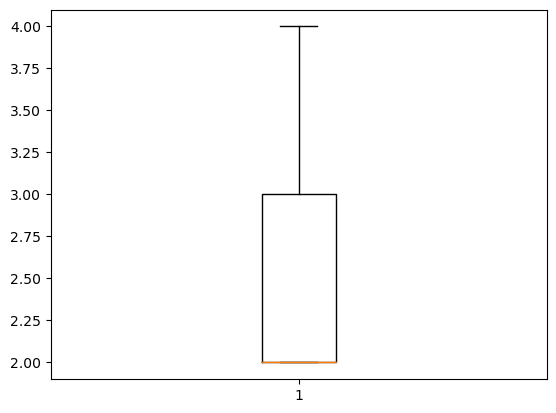

In [16]:
plt.boxplot(df["Bathrooms"]) 
plt.show()

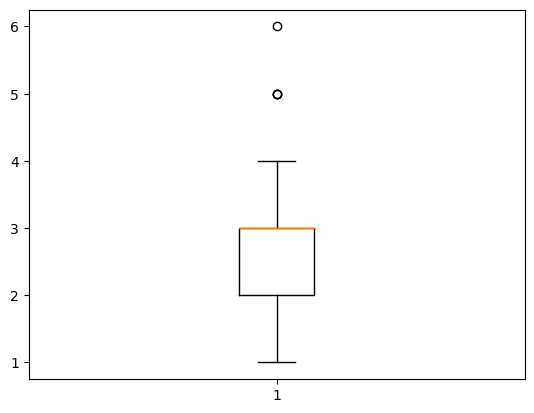

In [17]:
plt.boxplot(df["Offers"]) 
plt.show()

In [18]:
def remove_outlier(d,c):
    # where d is the variable for dataframe and c is the variable for column
    
    #find q1 and q2
    q1 = d[c].quantile(0.25)
    q3 = d[c].quantile(0.75)
    
    # calculate iqr(inter quartile range)
    iqr = q3-q1
    
    # find upper bound(ub) and lower bound(lb)
    ub =q3 +1.5*iqr
    lb =q1 -1.5*iqr
    
    # filter good data (ie eliminate outliers)
    data_without_outlier = d[(d[c]<=ub) & (d[c]>=lb)]
    
    return data_without_outlier

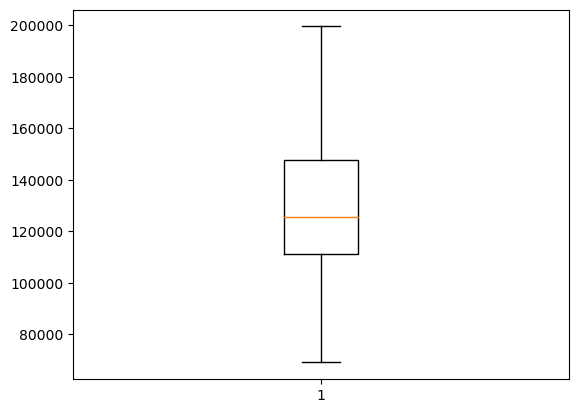

In [19]:
df = remove_outlier(df,"Price")

plt.boxplot(df["Price"])
plt.show()

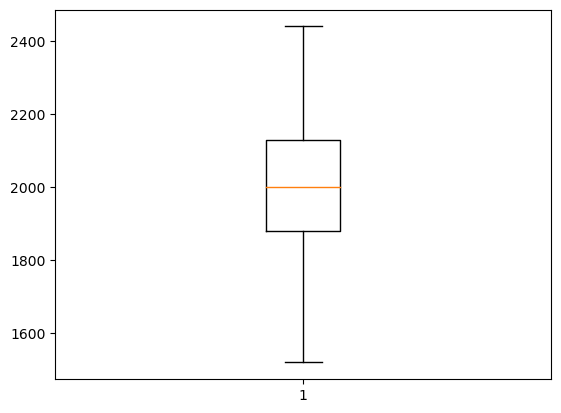

In [20]:

df = remove_outlier(df,"SqFt")

plt.boxplot(df["SqFt"])
plt.show()

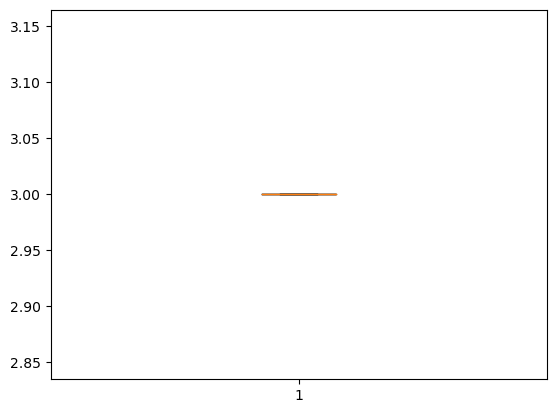

In [21]:
df = remove_outlier(df,"Bedrooms")

plt.boxplot(df["Bedrooms"])
plt.show()

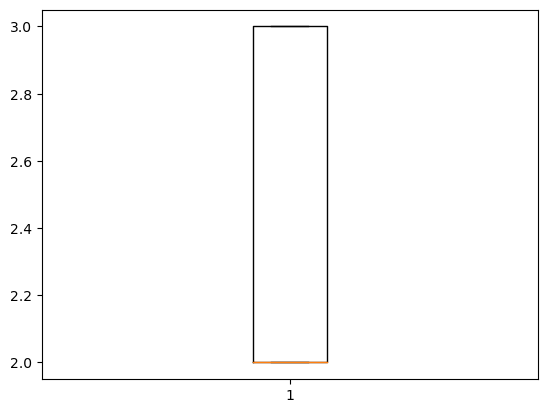

In [22]:
df = remove_outlier(df,"Bathrooms")

plt.boxplot(df["Bathrooms"])
plt.show()

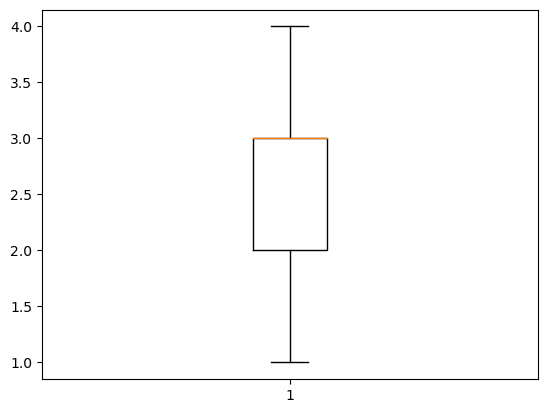

In [23]:
df = remove_outlier(df,"Offers")

plt.boxplot(df["Offers"])
plt.show()

# EDA 

    * DISTRIBUTION 
    * DATA MIX
    *CORRELATION

In [24]:
df.columns 

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [25]:
df.shape

(63, 8)

C:\Users\naimu\AppData\Local\Temp\ipykernel_17044\4165722021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Home"])


<Axes: xlabel='Home', ylabel='Density'>

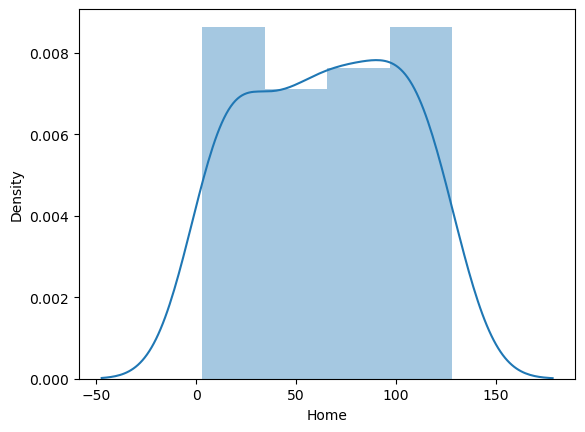

In [26]:
sns.distplot(df["Home"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_17044\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

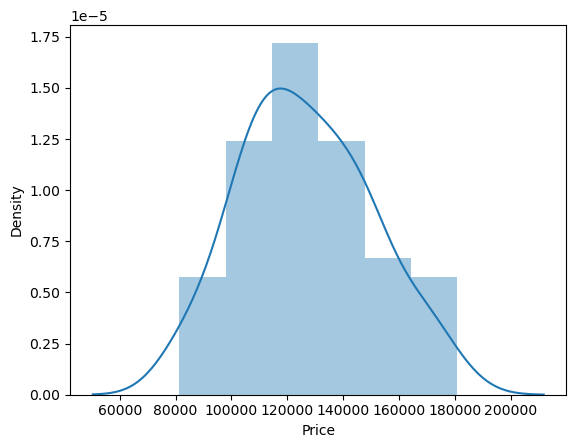

In [27]:
sns.distplot(df["Price"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_17044\1394517879.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SqFt"])


<Axes: xlabel='SqFt', ylabel='Density'>

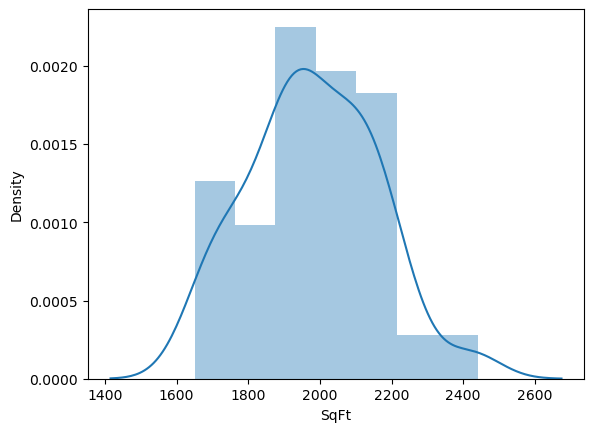

In [28]:
sns.distplot(df["SqFt"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_17044\1314421766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Bedrooms"])
C:\Users\naimu\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='Bedrooms', ylabel='Density'>

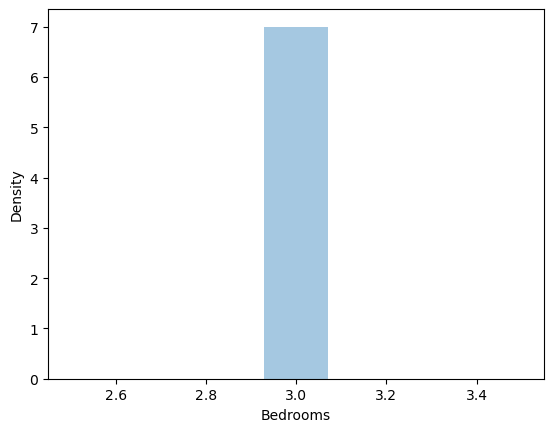

In [29]:
sns.distplot(df["Bedrooms"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_17044\2751140939.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Bathrooms"])


<Axes: xlabel='Bathrooms', ylabel='Density'>

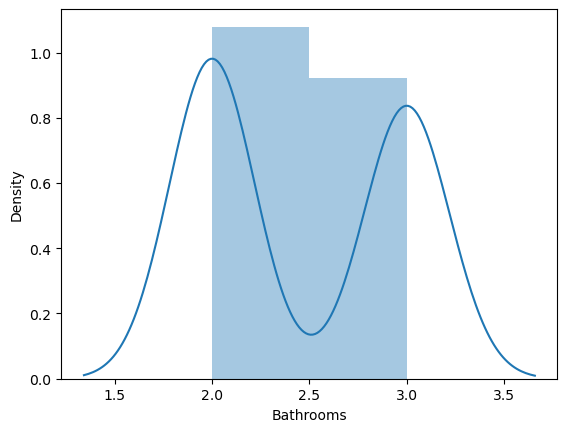

In [30]:
sns.distplot(df["Bathrooms"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_17044\3560520854.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Offers"])


<Axes: xlabel='Offers', ylabel='Density'>

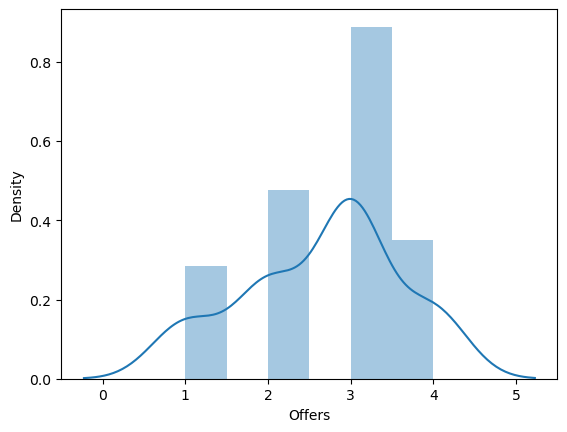

In [31]:
sns.distplot(df["Offers"])

In [32]:
# check data mix for categorical variables
# Cylindrer,Model_year,Car_name
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
2,3,114800,1740.0,3,2,1,No,East
3,4,94700,1980.0,3,2,3,No,East
4,5,119800,2130.0,3,3,3,No,East
5,6,114600,1780.0,3,2,2,No,North
6,7,151600,1830.0,3,3,3,Yes,West


<Axes: xlabel='Bedrooms'>

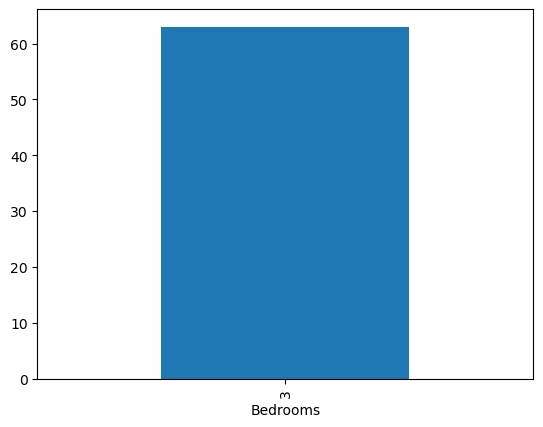

In [33]:
df.groupby("Bedrooms")["Bedrooms"].count().plot(kind = "bar")

<Axes: xlabel='Bathrooms'>

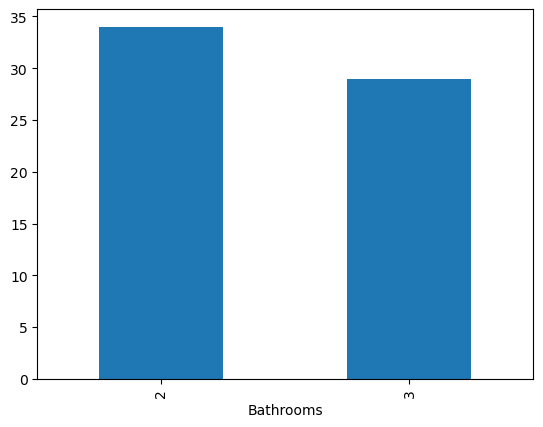

In [34]:
df.groupby("Bathrooms")["Bathrooms"].count().plot(kind = "bar")

<Axes: xlabel='Offers'>

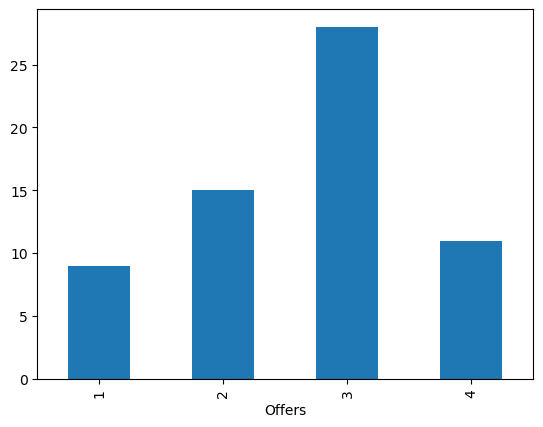

In [35]:
df.groupby("Offers")["Offers"].count().plot(kind = "bar")

<Axes: xlabel='Brick'>

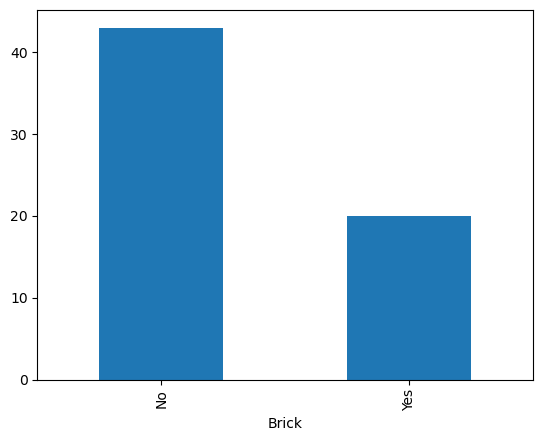

In [36]:
df.groupby("Brick")["Brick"].count().plot(kind = "bar")

<Axes: xlabel='Neighborhood'>

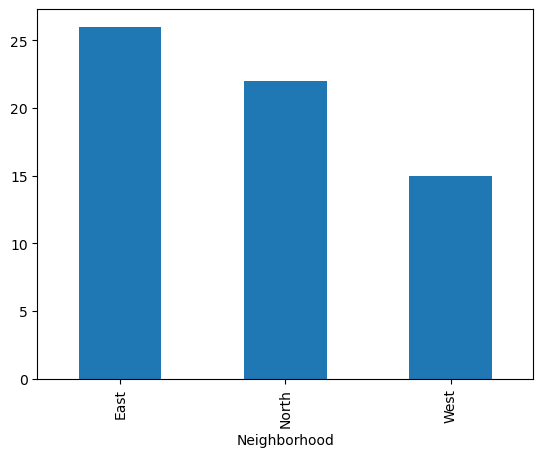

In [37]:
df.groupby("Neighborhood")["Neighborhood"].count().plot(kind = "bar")

# pearson correlation

In [38]:
#create a set of numeric columns
df_numeric = df.select_dtypes(include = ["int64","float64"])
df_numeric.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
2,3,114800,1740.0,3,2,1
3,4,94700,1980.0,3,2,3
4,5,119800,2130.0,3,3,3
5,6,114600,1780.0,3,2,2
6,7,151600,1830.0,3,3,3


In [39]:
# n df_numeric we have categorical variable. we needed to drop that
df_numeric = df_numeric.drop(["Bedrooms","Bathrooms","Offers"],axis = 1)
df_numeric.head()

,Home,Price,SqFt
2,3,114800,1740.0
3,4,94700,1980.0
4,5,119800,2130.0
5,6,114600,1780.0
6,7,151600,1830.0


<Axes: >

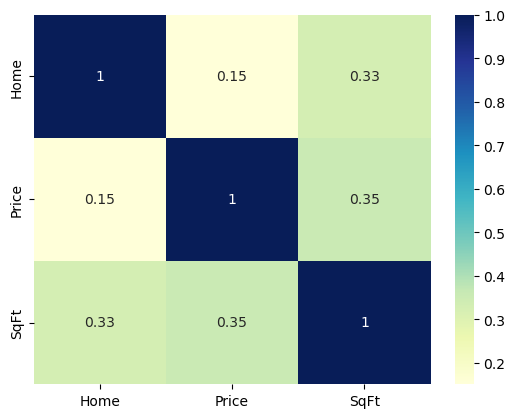

In [40]:
sns.heatmap(df_numeric.corr(),cmap ="YlGnBu",annot =True)

------------END OF EDA-------------------

In [41]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [43]:
df["Bedrooms"].unique()

array([3], dtype=int64)

In [44]:
df["Bathrooms"].unique()

array([2, 3], dtype=int64)

In [45]:
df["Offers"].unique()

array([1, 3, 2, 4], dtype=int64)

## dummy conversion (one-hot ending)

In [61]:
df.dtypes

Home              int64
Price             int64
SqFt            float64
Bedrooms          int64
Bathrooms         int64
Offers            int64
Brick            object
Neighborhood     object
dtype: object

In [62]:
#'Bedrooms', 'Bathrooms', 'Offers' are ctegorical variable stored as numeric.
# hence we need to change the datatype of variables to object
df["Bedrooms"]=df["Bedrooms"].astype("object")
df["Bathrooms"] = df["Bathrooms"].astype("object")
df["Offers"] = df["Offers"].astype("object")
df.dtypes

Home              int64
Price             int64
SqFt            float64
Bedrooms         object
Bathrooms        object
Offers           object
Brick            object
Neighborhood     object
dtype: object

In [63]:
# create a new df to store categorical variable for dummy covertion
df_categorical = df.select_dtypes(include ="object")
df_categorical.head()

,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
2,3,2,1,No,East
3,3,2,3,No,East
4,3,3,3,No,East
5,3,2,2,No,North
6,3,3,3,Yes,West


In [64]:
# dummy convertion
# we drop 1st index for removing dependence of independent variable(multicolinearity)
df_dummy = pd.get_dummies(df_categorical,drop_first=True)
df_dummy.head()

,Bathrooms_3,Offers_2,Offers_3,Offers_4,Brick_Yes,Neighborhood_North,Neighborhood_West
2,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False
4,True,False,True,False,False,False,False
5,False,True,False,False,False,True,False
6,True,False,True,False,True,False,True


In [65]:
#combine data from df_numeric and df_dummy
df_final = pd.concat([df_numeric,df_dummy],axis = 1)
df_final.head()

,Home,Price,SqFt,Bathrooms_3,Offers_2,Offers_3,Offers_4,Brick_Yes,Neighborhood_North,Neighborhood_West
2,3,114800,1740.0,False,False,False,False,False,False,False
3,4,94700,1980.0,False,False,True,False,False,False,False
4,5,119800,2130.0,True,False,True,False,False,False,False
5,6,114600,1780.0,False,True,False,False,False,True,False
6,7,151600,1830.0,True,False,True,False,True,False,True


In [66]:
# create x and y 

x = df_final.drop("Price",axis = 1)

y = df_final["Price"]

In [67]:
# from sklearn,feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [68]:
# testing and test sample
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.25,random_state=99)


In [69]:
#check sample size
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(47, 9) (16, 9) (47,) (16,)


## features selection
select significant variable

In [70]:
#craete a key_features object to select the top k features

key_features = SelectKBest(score_func = f_regression,k = 5) # to select 5 significant features

#fit the key features of training data and transform it
xtrain_selected = key_features.fit_transform(xtrain,ytrain)

selected_indices = key_features.get_support(indices =True)

selected_features = xtrain.columns[selected_indices]


In [71]:
#print the significant variables
selected_features

Index(['SqFt', 'Bathrooms_3', 'Brick_Yes', 'Neighborhood_North',
       'Neighborhood_West'],
      dtype='object')

## Build Linear Regression Model

In [72]:
# instantiate the linear regression function
linreg= LinearRegression()

# fit the model using training sample
linreg.fit(xtrain_selected,ytrain)

#print the accuracy of training model(Rsquared value)
linreg.score(xtrain_selected,ytrain)

0.7156785810793262

In [73]:
# evaluate the model on the test set using the selected features
xtest_selected = xtest.iloc[:,selected_indices]
score = linreg.score(xtest_selected,ytest)
score


C:\Users\naimu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.6173000885671147

In [75]:
predicted_mpg = linreg.predict(xtest_selected)

C:\Users\naimu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [76]:
#print predicted milege
print(predicted_mpg)

[132169.23368177 148257.98535229 107729.03913656 139235.18195251
 136320.83473374 122996.87229086 153167.722286   124675.19797635
 120487.10827134 164701.52200521 145759.97345048 147059.266105
  98569.66216327 140677.66277697 135475.17968218 110631.63423763]


In [77]:
#print B0(beta not=intercept)
linreg.intercept_

31111.58869676628

In [78]:
#print beta values
linreg.coef_

array([   41.6335317 ,  2777.77364526, 20693.1766925 , -2902.59510106,
       30182.60211286])